# The Positronium Wavefunction
## A Numerical Analysis
### Hunter Louscher

We set out to describe the behavior of the positronium atom on the basis of the time dependent Schroedinger equation.

$$\hat{H} \psi = i\hbar\frac{\partial}{\partial t}\psi$$

For many useful hamiltonians we find that the solutionspace to this partial differential equation is spanned by the solutions found via separation of variables. This is the case for the hamiltonian $\hat{H}$ describing a pair of particles attracted via coulomb potential with no other influences, so we can separate the time dependent portion and acquire the time independent Schroedinger equation, turning this into an eigenvalue problem for energy eigenvalues $E$.

$$\hat{H}\psi = E \psi$$

The Hamiltonian $\hat{H}$ is comprised of a kinetic energy operator $\hat{K}$ and a potential operator $\hat{V}$. In the simplest analyses we assume the classical kinetic energy $\frac{\hat{p}^2}{2 m}$ and a coulomb potential beholden only to the distance between the two particles. With the separation of variables 

$$\hat{H} = \frac{p^2}{2m} + k q\frac{1}{r}$$
$$p = i\hbar(\frac{\partial}{\partial x}+\frac{\partial}{\partial y}+\frac{\partial}{\partial z})$$
$$r = \sqrt{x^2 + y^2 + z^2}$$

The reasoning behind the momentum $\hat{p} = i\hbar\frac{\partial}{\partial x}$ (is explained in a Quantum 1 course, and wikipedia demonstrates the reasoning with DeBroglie waves). I can't be effed to work it out again myself.

Choose an axis. Along a 1d $x$ axis, the coulomb potential is given by $kq\frac{1}{x}$:

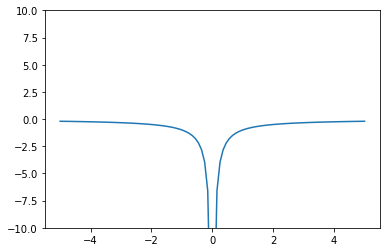

In [85]:
import numpy as np
import matplotlib.pyplot as plt
L = 100
ends = 5
x = np.linspace(-ends,ends,L);
y = -abs(1/x);
plt.plot(x,y);
plt.ylim(-10,10);

The functions with respect to the other two axes should not be affected by movement along the $x$ axis, so the kinetic energy term becomes:
$$\frac{p^2}{2m} = -\frac{\hbar^2}{2m}\nabla^2$$

We can discretize the second derivative in each direction over a collection of function values $\{f_n\}$:
$$f_k'' = \frac{f_{k-1} - 2f_k + f_{k+1}}{\Delta x^2}$$

Then the hamiltonian along the x axis can be discretized, and for each position $x_k$ the function values must satisfy $$-\frac{\hbar^2}{2m}\frac{f_{k-1} - 2f_k + f_{k+1}}{\Delta x^2} + \frac{kq}{x_k} f_k = E f_k$$
For constants $E$. Now this is simply an eigenvector-eigenvalue problem!

Let's reorganize the discrete hamiltonian into a matrix $\mathbf{H}$ and solve for the vector $\mathbf{f}$:

The $k^\text{th}$ row in the hamiltonian corresponds to each $f_k$ within the range of $x_k$ we have chosen.

$$\mathbf{H}\mathbf{f} = \left[\matrix{
-\frac{2}{\Delta x^2} + kq \frac{1}{x_1} & \frac{1}{\Delta x^2} & 0 & 0 &\cdots\\
\frac{1}{\Delta x^2} & -\frac{2}{\Delta x^2} + kq \frac{1}{x_2} & \frac{1}{\Delta x^2} & 0 & \\
0 & \frac{1}{\Delta x^2} & -\frac{2}{\Delta x^2} + kq \frac{1}{x_3} & \frac{1}{\Delta x^2} & \\
0 & 0 & \frac{1}{\Delta x^2} & -\frac{2}{\Delta x^2} + kq \frac{1}{x_4} & \\
\vdots &  &  &  & \ddots
}\right]\space
\left[\matrix{f_1\\f_2\\f_3\\f_4\\\vdots}\right]
 = E \left[\matrix{f_1\\f_2\\f_3\\f_4\\\vdots}\right]$$

In [78]:
dx = 2*ends /(L-1)
V = np.diag(-y);
Tfilt = -np.array([1, -2, 1])/dx**2
Trow = np.append(Tfilt, np.zeros(L-3))

T = np.array([np.roll(Trow,i-1) for i in range(L)])
T[0,-1] = 0
T[-1,0] = 0
H = T + V
E,F = np.linalg.eigh(H)


As will become clear in a moment, my simple theory for solving the equation in 3d with each axis independent seems to fail.

Here I demonstrate density by generating a 3d scatter plot, with points placed based on the likelihood of the particle appearing in their respective spot in the grid. I multiplied the chance by a million because there are a million points in the plot and the probabilities, as written, add up so that there should only be on average one particle found in the entire region. I kept adding zeros t the multiplier until the shape of the distribution became obvious.

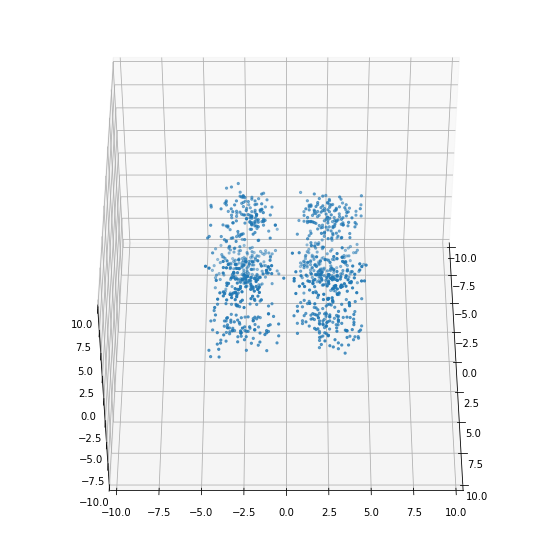

In [89]:
from random import random


n = 1
statex = 1
statey = 1
statez = 1
X = []
Y = []
Z = []
for i in range(int(L/n)):
    for j in range(int(L/n)):
        for k in range(int(L/n)):
            chance = random()/1000
            particle = (chance< F[statex,i*n]**2 * F[statey,j*n]**2 * F[statez,k*n]**2)
            if particle:
                X.append(x[i*n])
                Y.append(x[j*n])
                Z.append(x[k*n])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
lims = 2*np.array([-ends,ends])
ax.set_xlim(lims);
ax.set_ylim(lims);
ax.set_zlim(lims);

ax.scatter(X,Y,Z,s= 5)
ax.view_init(45,0)

This looks nothing like any of the analytically solved wavefunctions. Here is  an example of what the actual solutions should look like:

In [12]:
a = ends/25;
def psi320(r,theta):
    f = 1/np.sqrt(2*np.pi)
    P = lambda t: np.sqrt(10)/4 * (3*np.cos(t)**2 - 1)
    R = lambda t: 4*r*np.exp(-r/(3*a))/(81*np.sqrt(30) *a**(5/2))
    return P(theta)*R(r)
M = L
psigrid = np.zeros([M,M,M])

for i in range(M):
    for j in range(M):
        for k in range(M):
            r = np.sqrt(x[i]**2+x[j]**2+x[k]**2)
            theta = np.arcsin( x[k]/r)
            psigrid[i,j,k] = psi320(r,theta)**2;

psigrid/=np.sum(np.sum(np.sum(np.multiply(psigrid,psigrid))))*dx

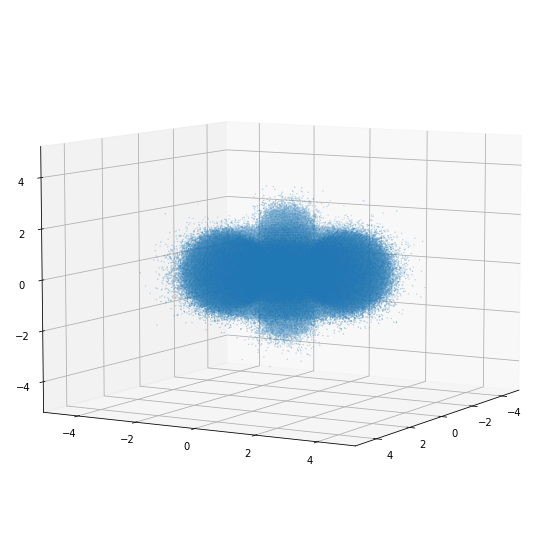

In [74]:
X = []
Y = []
Z = []
for i in range(M):
    for j in range(M):
        for k in range(M):
            chance = random()/1000000
            particle = (chance< psigrid[i,j,k]**2)
            if particle:
                X.append(x[i])
                Y.append(x[j])
                Z.append(x[k])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
lims = np.array([-ends,ends])
ax.set_xlim(lims);
ax.set_ylim(lims);
ax.set_zlim(lims);

ax.scatter(X,Y,Z,s= .05)
ax.view_init(7.5,30)

 Note the rotational symmetry in the x-y plane and mirror symmetry along the z axis.

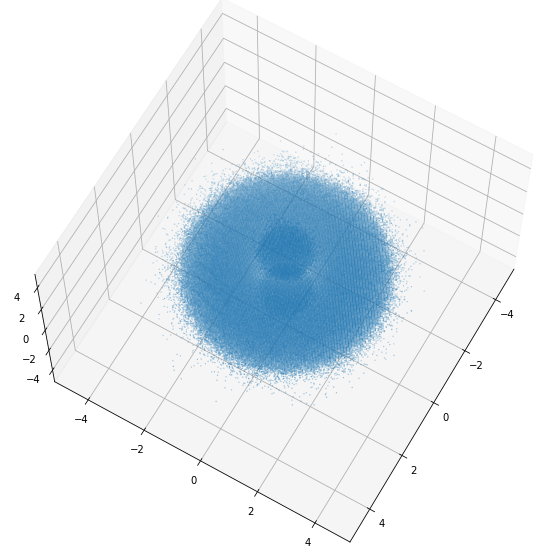

In [75]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
lims = np.array([-ends,ends])
ax.set_xlim(lims);
ax.set_ylim(lims);
ax.set_zlim(lims);

ax.scatter(X,Y,Z,s= .05)
ax.view_init(65,30)

Two cross sectional views:

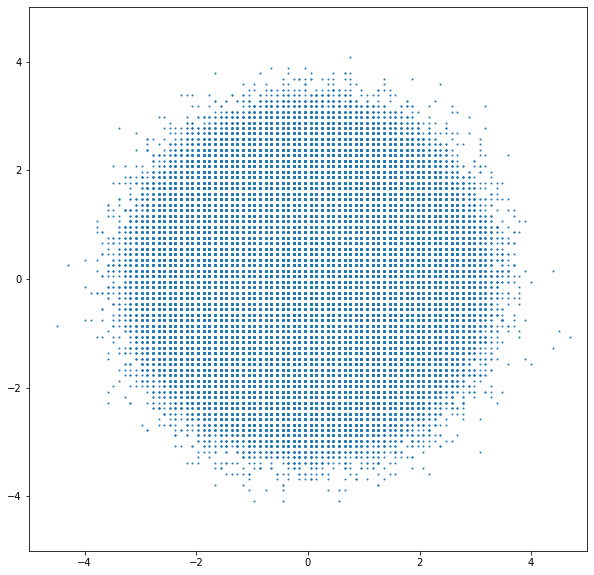

In [76]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
lims = np.array([-ends,ends])
ax.set_xlim(lims);
ax.set_ylim(lims);

ax.scatter(X,Y,s= 1)

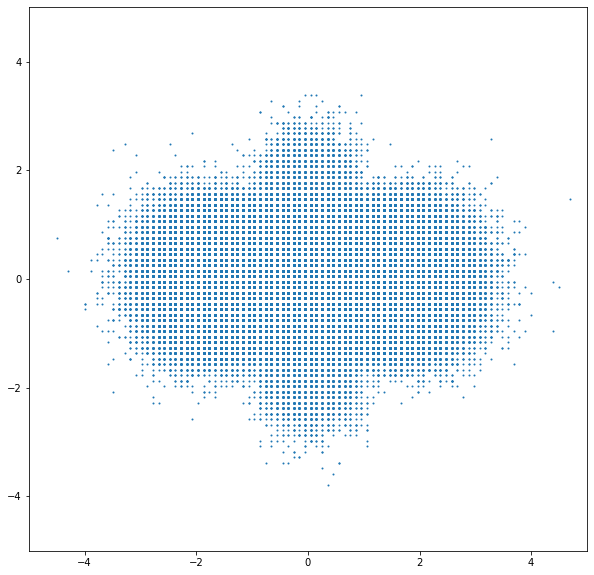

In [77]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
lims = np.array([-ends,ends])
ax.set_xlim(lims);
ax.set_ylim(lims);

ax.scatter(X,Z,s= 1)